In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import ipywidgets

In [28]:
trainData = pd.read_csv("./train.csv")
testData = pd.read_csv("./test.csv")

In [3]:
uniqueValues = {col: trainData[col].nunique() for col in trainData.columns}
uniqueValues

{'id': 165034,
 'CustomerId': 23221,
 'Surname': 2797,
 'CreditScore': 457,
 'Geography': 3,
 'Gender': 2,
 'Age': 71,
 'Tenure': 11,
 'Balance': 30075,
 'NumOfProducts': 4,
 'HasCrCard': 2,
 'IsActiveMember': 2,
 'EstimatedSalary': 55298,
 'Exited': 2}

In [4]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
trainData.CreditScore.max() , trainData.CreditScore.min()

(850, 350)

# About the data

The CustomerId column has too many unique values and if of no use\
The Surname has new values in the test dataset that are not present in the train dataset do drop it\
We can add a feature GoodCreditScore if credit score is greater than 670\
Geography , Gender NumOfProducts can be oneHot Encoded\
The last column Exited is the target column

In [6]:
X_train = trainData.iloc[:,:-1].copy() 
y_train = trainData.iloc[:,-1]()
X_test = pd.read_csv('./test.csv')

In [7]:
# Lable encoding Surname
X_train.drop(["Surname","id","CustomerId"],inplace=True,axis=1)
X_test.drop(["Surname","id","CustomerId"],inplace=True,axis=1)

In [9]:
column_name = 'NumOfProducts'  # Replace with the name of your column
unique_values = trainData[column_name].unique()
print(f"Unique values in the '{column_name}' column:")
print(unique_values)

Unique values in the 'NumOfProducts' column:
[2 1 3 4]


In [10]:
# One hot encoding
catCols = ['Geography', 'Gender', 'NumOfProducts']

oneHot = OneHotEncoder()
X_train_encoded = oneHot.fit_transform(X_train[catCols])
X_test_encoded = oneHot.transform(X_test[catCols])

# Get the new column names from the one-hot encoder
newCols = oneHot.get_feature_names_out(catCols)

# Add the one-hot encoded columns to the existing DataFrames
X_train = pd.concat([X_train, pd.DataFrame(X_train_encoded.toarray(), columns=newCols, index=X_train.index)], axis=1)
X_test = pd.concat([X_test, pd.DataFrame(X_test_encoded.toarray(), columns=newCols, index=X_test.index)], axis=1)

# Drop the original categorical columns
X_train.drop(catCols, inplace=True, axis=1)
X_test.drop(catCols, inplace=True, axis=1)

In [11]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [12]:
# model = keras.Sequential([
#     layers.Dense(16,activation='relu'),
#     layers.Dropout(0.25),
#     layers.Dense(8,activation='relu'),
#     layers.Dense(4,activation='relu'),
#     layers.Dense(1,activation='sigmoid')
# ])
model = keras.Sequential([
    layers.Dense(32,activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(16,activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(4,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

In [13]:
from keras.metrics import AUC
model.compile( optimizer='adam',loss='binary_crossentropy',metrics=["accuracy",AUC()])

In [14]:
x,x_v,y,y_v = train_test_split(X_train_scaled,y_train) 

In [15]:
x_v.shape

(41259, 16)

In [16]:
history = model.fit(x,y,epochs=40,validation_data=(x_v,y_v))

Epoch 1/40
3868/3868 [==============================] - 14s 3ms/step - loss: 0.3632 - accuracy: 0.8472 - auc: 0.8549 - val_loss: 0.3349 - val_accuracy: 0.8582 - val_auc: 0.8792
Epoch 2/40
3868/3868 [==============================] - 9s 2ms/step - loss: 0.3410 - accuracy: 0.8581 - auc: 0.8729 - val_loss: 0.3315 - val_accuracy: 0.8601 - val_auc: 0.8813
Epoch 3/40
3868/3868 [==============================] - 12s 3ms/step - loss: 0.3370 - accuracy: 0.8600 - auc: 0.8759 - val_loss: 0.3312 - val_accuracy: 0.8608 - val_auc: 0.8831
Epoch 4/40
3868/3868 [==============================] - 12s 3ms/step - loss: 0.3343 - accuracy: 0.8610 - auc: 0.8778 - val_loss: 0.3302 - val_accuracy: 0.8611 - val_auc: 0.8828
Epoch 5/40
3868/3868 [==============================] - 12s 3ms/step - loss: 0.3340 - accuracy: 0.8616 - auc: 0.8780 - val_loss: 0.3302 - val_accuracy: 0.8616 - val_auc: 0.8824
Epoch 6/40
3868/3868 [==============================] - 12s 3ms/step - loss: 0.3329 - accuracy: 0.8621 - auc: 0.8788

In [17]:
y_train.dtypes

dtype('int64')

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc'])

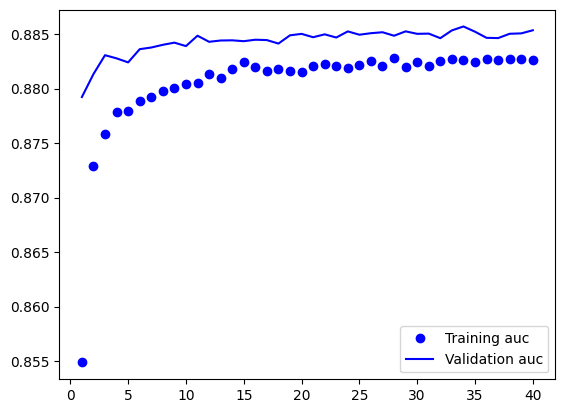

In [21]:
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
auc = history_dict['auc']
val_auc = history_dict['val_auc']
epochs = range(1,len(accuracy)+1)
plt.plot(epochs, auc, "bo", label="Training auc")
plt.plot(epochs, val_auc, "b", label="Validation auc") 
plt.legend()
plt.show()

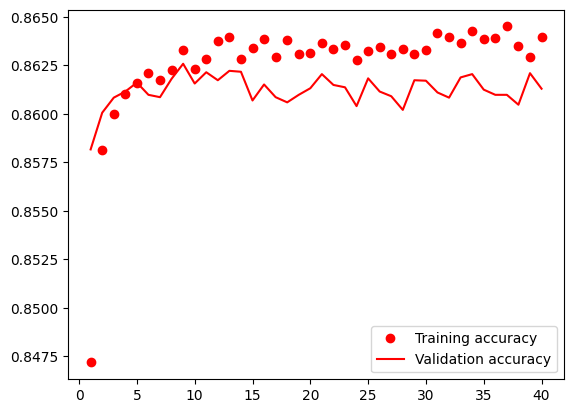

In [22]:
plt.plot(epochs, accuracy, "ro", label="Training accuracy")
plt.plot(epochs, val_accuracy, "r", label="Validation accuracy") 
plt.legend()
plt.show()

In [23]:
NNresults = model.predict(X_test_scaled)

3439/3439 [==============================] - 5s 1ms/step


In [ ]:
# predictions = predictions.reshape(-1)
# results_df = pd.DataFrame(data={'id':testData.iloc[:,0], 'Exited': predictions})
# results_df.head()
# results_df.to_csv('nnSubmission.csv',index=False)

# Implementing Catboost classifier

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier

In [36]:
trainData = pd.read_csv('./train.csv')
trainData.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [37]:
X = trainData.iloc[:,:-1] 
y = trainData.iloc[:,-1]
X_test = pd.read_csv('./test.csv')
X.drop(["Surname","id","CustomerId"],inplace=True,axis=1)
X_test.drop(["Surname","id","CustomerId"],inplace=True,axis=1)

In [38]:
# Using apply(str) method
# Convert float columns to string
# X_train['HasCrCard'] = X_train['HasCrCard'].astype(str)
# X_train['IsActiveMember'] = X_train['IsActiveMember'].astype(str)
# X_train['Geography'] = X_train['Geography'].astype(str)
# X_train['Gender'] = X_train['Gender'].astype(str)


# # Repeat for X_val and X_test if necessary
# X_val['HasCrCard'] = X_val['HasCrCard'].astype(str)
# X_val['IsActiveMember'] = X_val['IsActiveMember'].astype(str)
# X_val['Geography'] = X_val['Geography'].astype(str)
# X_val['Gender'] = X_val['Gender'].astype(str)


X_test['HasCrCard'] = X_test['HasCrCard'].astype(str)
X_test['IsActiveMember'] = X_test['IsActiveMember'].astype(str)
X_test['Geography'] = X_test['Geography'].astype(str)
X_test['Gender'] = X_test['Gender'].astype(str)

X['HasCrCard'] = X['HasCrCard'].astype(str)
X['IsActiveMember'] = X['IsActiveMember'].astype(str)
X['Geography'] = X['Geography'].astype(str)
X['Gender'] = X['Gender'].astype(str)


In [43]:
X_train,X_val,y_train,y_val = train_test_split(X,y)

In [45]:
%%time

catCols = ['Tenure','NumOfProducts','HasCrCard','IsActiveMember','Geography','Gender']
catColsIndices = [X.columns.get_loc(col) for col in catCols]
catColsIndices

params = {
    'eval_metric' : 'AUC' ,
    'verbose' : 200, 
    'cat_features' : catColsIndices,
    'early_stopping_rounds' : 50,
    'task_type' : 'GPU'
}



CPU times: total: 0 ns
Wall time: 0 ns


In [46]:
from catboost import Pool

trainPool = Pool(X_train,label=y_train,cat_features=  catColsIndices)
valPool = Pool(X_val,label = y_val,cat_features = catColsIndices) 
testPool = Pool(X_test,cat_features=catColsIndices) 

In [47]:
%%time 
cbcInit = CatBoostClassifier(iterations=5000,**params)
cbcInit.fit(trainPool, eval_set=valPool, verbose=2000, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.024282


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8765415	best: 0.8765415 (0)	total: 133ms	remaining: 11m 3s
bestTest = 0.8931997418
bestIteration = 1192
Shrink model to first 1193 iterations.
CPU times: total: 1min 1s
Wall time: 1min 19s


In [48]:
catResults = cbcInit.predict_proba(X_test)

In [49]:
cbcInit.feature_importances_

array([ 3.48584768,  5.98754626,  4.29527958, 20.11388801,  1.16477606,
       10.40158225, 39.57019919,  1.07841675, 10.80806695,  3.09439728])

In [ ]:
# predictions = predictions[:,1]
# predictions = predictions.reshape(-1)
# results_df = pd.DataFrame(data={'id':testData.iloc[:,0], 'Exited': predictions})
# results_df.head()
# results_df.to_csv('nnSubmission.csv',index=False)

# XG boost Clasifier

In [50]:
from xgboost import XGBClassifier

xgbClf = XGBClassifier(enable_categorical= True,device = 'cuda')

X = trainData.iloc[:,:-1] 
y = trainData.iloc[:,-1]
X_test = pd.read_csv('./test.csv')
X.drop(["Surname","id","CustomerId"],inplace=True,axis=1)
X_test.drop(["Surname","id","CustomerId"],inplace=True,axis=1)

In [51]:
catCols = ['Tenure','NumOfProducts','HasCrCard','IsActiveMember','Geography','Gender']
for col in catCols:
    X[col] = X[col].astype("category")
    X_test[col] = X_test[col].astype("category")    

In [52]:
%%time 
xgbClf.fit(X,y)

CPU times: total: 1.48 s
Wall time: 1.37 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [53]:
xgbResult = xgbClf.predict_proba(X_test)

C:\Users\abhir\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:21:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [ ]:
# predictions = results[:,1]
# predictions = predictions.reshape(-1)
# results_df = pd.DataFrame(data={'id':testData.iloc[:,0], 'Exited': predictions})
# results_df.head()
# results_df.to_csv('nnSubmission.csv',index=False)

In [54]:
xgbClf.feature_importances_

array([0.00758864, 0.04192649, 0.03805833, 0.0998963 , 0.00936214,
       0.02387659, 0.59864056, 0.00934825, 0.1635569 , 0.00774585],
      dtype=float32)

# Creating a model Ensemble by combining the outputs of the above 3 models

In [57]:
avgResult = (NNresults+catResults+xgbResult)/3
avgResult[:10]

array([[0.66126018, 0.02091342],
       [0.39554402, 0.83124525],
       [0.67448999, 0.0354755 ],
       [0.57270776, 0.26377655],
       [0.56643976, 0.35899819],
       [0.64800514, 0.05136927],
       [0.65520944, 0.04632182],
       [0.64963391, 0.08893547],
       [0.45527898, 0.6143532 ],
       [0.66640357, 0.01467422]])

In [58]:
predictions = avgResult[:,1]
predictions = predictions.reshape(-1)
results_df = pd.DataFrame(data={'id':testData.iloc[:,0], 'Exited': predictions})
results_df.head()
results_df.to_csv('nnSubmission.csv',index=False)